# **Wprowadzenie do TensorFlow i Keras**
TensorFlow i Keras to dwie popularne biblioteki do budowy i trenowania modeli uczenia maszynowego oraz głębokiego uczenia. TensorFlow zapewnia niskopoziomowe operacje matematyczne i narzędzia do zarządzania gradientami, podczas gdy Keras jest warstwą wysokiego poziomu do łatwego tworzenia sieci neuronowych.

## **1. Instalacja i import bibliotek**
TensorFlow i Keras można zainstalować razem, ponieważ Keras jest częścią TensorFlow od wersji 2.0:
```bash
pip install tensorflow
```
Poniżej importujemy kluczowe moduły:

In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

## **2. Klasyfikacja: Rozpoznawanie cyfr MNIST**
### **Opis problemu:**
Celem jest klasyfikacja obrazów przedstawiających ręcznie pisane cyfry (MNIST) do jednej z 10 klas (cyfry 0-9).

### **Kroki:**
1. Załaduj dane MNIST.
2. Przygotuj dane (normalizacja).
3. Zbuduj prostą sieć neuronową (Dense).
4. Wytrenuj model.
5. Oceń model.

In [ ]:
# Załaduj dane MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizacja danych
X_train, X_test = X_train / 255.0, X_test / 255.0

# Budowa modelu
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Trenowanie modelu
model.fit(X_train, y_train, epochs=5)

# Ocena modelu
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Dokładność na zbiorze testowym: {test_accuracy:.2f}')


d:\ProjektyPython\ML_NN\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8791 - loss: 0.4243
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9639 - loss: 0.1228
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9766 - loss: 0.0786
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9829 - loss: 0.0571
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9869 - loss: 0.0438
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0984
Dokładność na zbiorze testowym: 0.97
You must install pydot (`pip install pydot`) for `plot_model` to work.


## **3. Sieć konwolucyjna (CNN)**
### **Opis problemu:**
Zwiększenie dokładności modelu klasyfikacji MNIST poprzez zastosowanie sieci konwolucyjnych (CNN), które lepiej rozpoznają cechy obrazów.

### **Kroki:**
1. Zmień format danych wejściowych na obrazy.
2. Zbuduj sieć CNN.
3. Wytrenuj model.
4. Oceń wyniki.

In [21]:
# Formatowanie danych na obrazy (dodanie kanału kolorów)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Budowa modelu CNN
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Kompilacja modelu
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Trenowanie modelu
cnn_model.fit(X_train, y_train, epochs=5)

# Ocena modelu
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Dokładność CNN na zbiorze testowym: {test_accuracy:.2f}')

d:\ProjektyPython\ML_NN\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9077 - loss: 0.3166
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9835 - loss: 0.0564
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9889 - loss: 0.0359
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9923 - loss: 0.0246
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9952 - loss: 0.0162
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9811 - loss: 0.0569
Dokładność CNN na zbiorze testowym: 0.98


## **4. Regresja: Przewidywanie cen domów**
### **Opis problemu:**
Celem jest przewidzenie cen domów na podstawie danych wejściowych, takich jak średni dochód czy wielkość populacji w danym regionie (zestaw California Housing).

### **Kroki:**
1. Przygotuj dane (skalowanie i podział).
2. Zbuduj model regresji.
3. Wytrenuj model.
4. Oceń wyniki.

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Załaduj dane
data = fetch_california_housing()
X, y = data.data, data.target

# Skalowanie danych
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Podział na zbiory
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Budowa modelu regresji
reg_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Wyjście dla regresji
])

# Kompilacja modelu
reg_model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mae'])

# Trenowanie modelu
reg_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Ocena modelu
loss, mae = reg_model.evaluate(X_test, y_test)
print(f'Średni błąd absolutny (MAE): {mae:.2f}')

Epoch 1/10


d:\ProjektyPython\ML_NN\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6291 - mae: 0.8724
Epoch 2/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4348 - mae: 0.4681
Epoch 3/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3747 - mae: 0.4339
Epoch 4/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3753 - mae: 0.4255
Epoch 5/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3403 - mae: 0.4099
Epoch 6/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3431 - mae: 0.4055
Epoch 7/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3343 - mae: 0.4003
Epoch 8/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3203 - mae: 0.3905
Epoch 9/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3123 - mae: 0.3855
Epoch 10/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3029 - mae: 0.3823
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3076 - mae: 0.3811
Średni błąd absolutny (MAE): 0.38


## **5. Przyspieszanie obliczeń dzięki GPU**
TensorFlow automatycznie wykrywa dostępność GPU, co może znacząco zwiększyć prędkość trenowania modeli. Aby sprawdzić dostępność GPU, użyj poniższego kodu:

In [23]:
print("Czy TensorFlow widzi GPU?")
print("GPU dostępne:", tf.config.list_physical_devices('GPU'))

Czy TensorFlow widzi GPU?
GPU dostępne: []


## **6. LSTM do prognozowania sekwencji**
Używamy warstwy LSTM do przewidywania następnych wartości w sekwencji.

d:\ProjektyPython\ML_NN\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


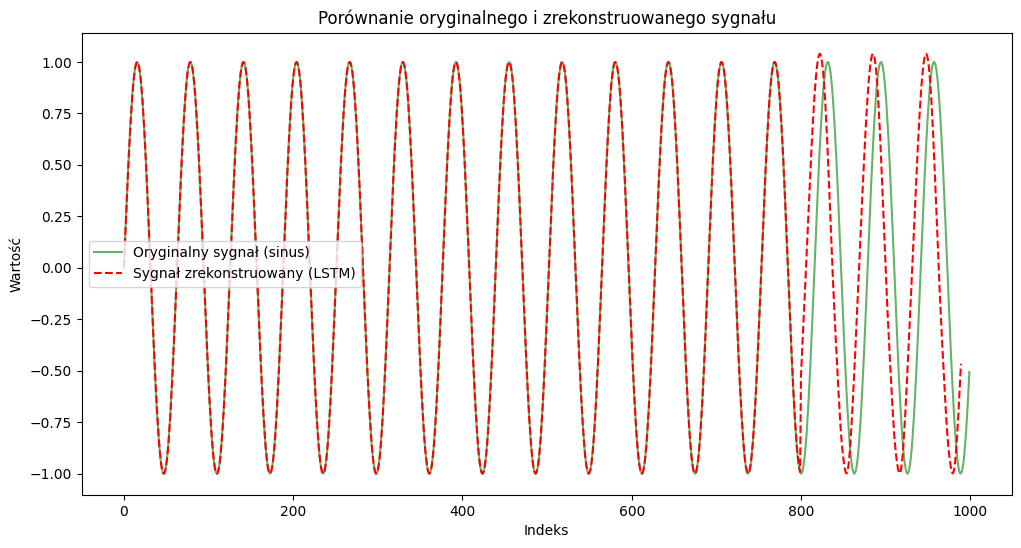

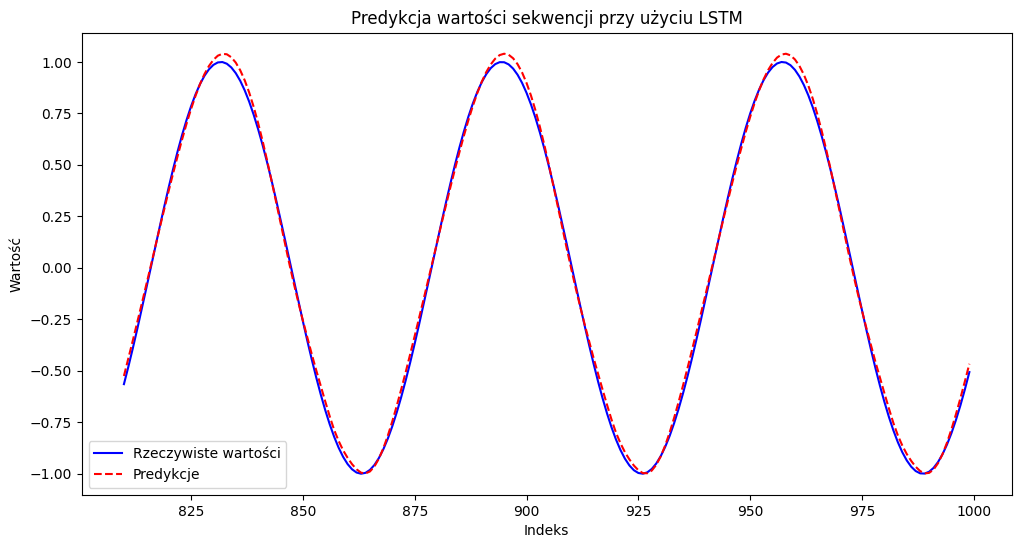

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

# Generowanie danych sekwencyjnych
data = np.sin(np.linspace(0, 100, 1000))  # Sygnał sinusoidalny
window_size = 10

X, y = [], []
for i in range(len(data) - window_size):
    X.append(data[i:i + window_size])
    y.append(data[i + window_size])

X, y = np.array(X), np.array(y)

# Podział na zbiory treningowe i testowe
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

# Dodanie wymiaru do danych wejściowych
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Budowa modelu LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='mse')

# Trenowanie modelu
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Predykcja
predictions = model.predict(X_test)

# Rekonstrukcja sygnału sinusoidalnego na podstawie predykcji
reconstructed_signal = np.concatenate([data[:800], predictions.flatten()])

# Wizualizacja sygnału sinusoidalnego
plt.figure(figsize=(12, 6))
plt.plot(data, label='Oryginalny sygnał (sinus)', color='green', alpha=0.6)
plt.plot(reconstructed_signal, label='Sygnał zrekonstruowany (LSTM)', color='red', linestyle='--')
plt.title('Porównanie oryginalnego i zrekonstruowanego sygnału')
plt.xlabel('Indeks')
plt.ylabel('Wartość')
plt.legend()
plt.show()

# Wizualizacja predykcji w porównaniu do rzeczywistych wartości
plt.figure(figsize=(12, 6))
plt.plot(range(810, 1000), y_test, label='Rzeczywiste wartości', color='blue')
plt.plot(range(810, 1000), predictions.flatten(), label='Predykcje', color='red', linestyle='--')
plt.title('Predykcja wartości sekwencji przy użyciu LSTM')
plt.xlabel('Indeks')
plt.ylabel('Wartość')
plt.legend()
plt.show()


## **7. Autoenkoder – redukcja wymiarów**
Autoenkoder to rodzaj sieci neuronowej, która uczy się kodować dane do mniejszego wymiaru, a następnie je rekonstruować.

In [25]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np

# Generowanie danych
data = np.random.rand(1000, 20)  # 1000 próbek, 20 cech

# Warstwa wejściowa
input_data = Input(shape=(20,))
encoded = Dense(10, activation='relu')(input_data)  # Kodowanie
decoded = Dense(20, activation='sigmoid')(encoded)  # Odtwarzanie

# Budowa modelu autoenkodera
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Trenowanie autoenkodera
autoencoder.fit(data, data, epochs=10, batch_size=32)

# Uzyskanie zakodowanej reprezentacji
encoder = Model(input_data, encoded)
encoded_data = encoder.predict(data)
print("Zakodowana reprezentacja (pierwszy wiersz):", encoded_data[0])


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0883
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0829 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0818 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0801 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0792
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0776
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0764
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0736
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0723
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0684
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Zakodowana reprezentacja (pierwszy wiersz): [0.31499514 0.10079196 0.90983224 1.2143006  0.63790387 1.2693423
 0.28130364 0.         0.1742892  0.24250963]


## **Podsumowanie**
TensorFlow i Keras to potężne narzędzia do budowy modeli uczenia maszynowego. Dzięki łatwości użycia Keras oraz skalowalności TensorFlow, można budować zarówno proste, jak i zaawansowane modele dostosowane do różnych potrzeb. 